In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

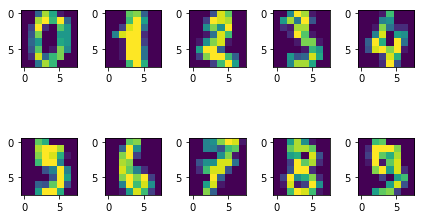

In [28]:
digits=load_digits()
f,axes=plt.subplots(2,5)
axes[0,0].imshow(digits.images[0])
axes[0,1].imshow(digits.images[1])
axes[0,2].imshow(digits.images[2])
axes[0,3].imshow(digits.images[3])
axes[0,4].imshow(digits.images[4])
axes[1,0].imshow(digits.images[5])
axes[1,1].imshow(digits.images[6])
axes[1,2].imshow(digits.images[7])
axes[1,3].imshow(digits.images[8])
axes[1,4].imshow(digits.images[9])
plt.tight_layout()
plt.show()

In [29]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [30]:
#Creating Logistic Regression class
class LogisticRegression():
    """ Class for training and using a model for Logistic Regression"""
    
    def set_values(self,initial_params,alpha=0.01,max_iter=5000,class_of_interest=0):
        """Sets the value for
        initial_params: The initial parameters to start with
        alpha: Step size analogus to the learning rate in Linear Regression
        max_iter: Maximum number of iterations to be carried out
        class_of_interest: this determines to which class (0 to 9) the image belongs depending 
                            on the probability value according to concept of one-vs-all"""
        self.params=initial_params
        self.alpha=alpha
        self.max_iter=max_iter
        self.class_of_interest=class_of_interest
        
        
        
    @staticmethod
    def _sigmoid(x):
        """Its a sigmoid function"""
        
        return 1.0 / (1.0 + np.exp(-x))
    
    
    
    def predict(self, x_bar, params):
        """This function uses sigmoid function to predict the probability
        of an output belonging to a particular class"""
        
        return self._sigmoid(np.dot(params,x_bar))
    
    
    
    def _compute_cost(self, input_var, output_var,params):
        """This computes the log likelihood cost"""
        
        cost = 0
        for x, y in zip(input_var,output_var):
            # y = theta_0 + x_1 * theta_1 + x_2 * theta_2 +....+ x_n * theta_n
            # Here x_0 is 1 for theta_0 so x=[ 1, x_0, x_1, x_2, ...., x_n] where x is out input feature
            # We need to add 1 in x at the position 0
            x_bar = np.array(np.insert(x, 0, 1))
            y_hat = self.predict(x_bar, params) # Calculates the predicted value
            
#             Now, during training, the class of our interest value is the y value which is the target label. 
#             suppose, if our class_of_interest is 2 (which we provide, to train for 2) and if the y (label) value for 
#             currosponding x (feature) value is also 2 in dataset then we take y_binary = 1 else y_binary=0 in cost function

            y_binary = 1.0 if y == self.class_of_interest else 0.0
            cost += y_binary * np.log(y_hat) + (1.0 - y_binary) * np.log(1 - y_hat) 
        
        return cost
    
    
    
    def train(self, input_var, label, print_iter=5000):
        """This trains the model using Batch Gradient Descent"""
        
        print(f"Training for digit: {self.class_of_interest}")
        iteration=1
        while iteration<self.max_iter:
    
            if iteration % print_iter == 0:
                print(f"Cost: {self._compute_cost(input_var, label,self.params)}, Iteration: {iteration}")
            
            # Iterate over each and every value of the dataset
            for i, xy in enumerate(zip(input_var,label)):
                x_bar = np.array(np.insert(xy[0],0,1))
                y_hat = self.predict(x_bar, self.params)
                y_binary = 1.0 if xy[1]==self.class_of_interest else 0.0
                gradient = (y_binary - y_hat) * x_bar
                self.params += self.alpha * gradient
                
            iteration += 1
        
        return self.params
    
    
    def test(self, input_test,label_test):
        """This function will test the accuracy of the model.
        Accuracy = (total classification / correct classification)"""
        
        self.total_classification=0
        self.correct_classification=0
        
        for x, y in zip(input_test, label_test):
            self.total_classification += 1
            x_bar = np.array(np.insert(x,0,1))
            y_hat = self.predict(x_bar , self.params)
            y_binary = 1.0 if y == self.class_of_interest else 0.0
            
            # considering threshold probability = 0.5
            if y_hat >=0.5 and y_binary == 1:  #predicted probability > 0.5 and if y is same as our class of interest
                self.correct_classification += 1
            
            if y_hat < 0.5 and y_binary != 1:  #predicted probability < 0.5 and if y is NOT same as our class of interest
                self.correct_classification += 1
        
        self.accuracy = self.correct_classification / self.total_classification
    
        return self.accuracy

In [31]:
# Spliting the data in to train and test
digits_train, digits_test, digits_label_train, digits_label_test = train_test_split(digits.data,digits.target,test_size=0.2)

In [15]:
# Training the classifier for ZERO digit
print_iter=1000
class_of_interest=0
alpha = 1e-2
max_iter = 10000
# Assumption of initial values of parameters
initial_param_value=np.zeros(len(digits.data[0])+1)
# Initializing LogisticRegression() class
dig_log_reg=LogisticRegression()
# Setting the class variables
dig_log_reg.set_values(initial_param_value,alpha,max_iter,class_of_interest)
# Training the model
parameters = dig_log_reg.train(digits_train/16.0,digits_label_train,print_iter) #we divided the train data by 16 to normalize it as the maximum value in training data column is 16


Training for digit: 0
Cost: -1.846328622884904, Iteration: 1000
Cost: -1.0372192871263992, Iteration: 2000
Cost: -0.729206981163873, Iteration: 3000
Cost: -0.5647111806365639, Iteration: 4000
Cost: -0.4618231006867816, Iteration: 5000
Cost: -0.3911854300348703, Iteration: 6000
Cost: -0.3395965741720156, Iteration: 7000
Cost: -0.3002192967939829, Iteration: 8000
Cost: -0.2691499966537756, Iteration: 9000


In [16]:
# Calculating the accuracy on test data
digits_accuracy=dig_log_reg.test(digits_test/16.0,digits_label_test)
print(f'Accuracy of prediciting a Zero digit in test set: {digits_accuracy}')

Accuracy of prediciting a Zero digit in test set: 0.9972222222222222


In [17]:
def train_test_digit(digit):
    # Training the classifier for ZERO digit
    print_iter=1000
    class_of_interest=digit
    alpha = 1e-2
    max_iter = 10000
    # Assumption of initial values of parameters
    initial_param_value=np.zeros(len(digits.data[0])+1)
    # Initializing LogisticRegression() class
    dig_logreg=LogisticRegression()
    # Setting the class variables
    dig_logreg.set_values(initial_param_value,alpha,max_iter,class_of_interest)
    # Training the model
    parameters = dig_logreg.train(digits_train/16.0,digits_label_train,print_iter) #we divided the train data by 16 to normalize it as the maximum value in training data column is 16
    # Calculate Accuracy
    digits_accuracy=dig_logreg.test(digits_test/16.0,digits_label_test)
    print(f'-------------------------------------------------------------------------------------')
    print(f'Accuracy of prediciting a {class_of_interest} digit in test set: {digits_accuracy}')
    return digits_accuracy

In [18]:
train_test_digit(1)

Training for digit: 1
Cost: -31.001711361197675, Iteration: 1000
Cost: -24.382166323027484, Iteration: 2000
Cost: -21.028330253945015, Iteration: 3000
Cost: -18.852812374623827, Iteration: 4000
Cost: -17.268169403144668, Iteration: 5000
Cost: -16.032605000590873, Iteration: 6000
Cost: -15.025546285383262, Iteration: 7000
Cost: -14.179015936199473, Iteration: 8000
Cost: -13.451199449110883, Iteration: 9000
-------------------------------------------------------------------------------------
Accuracy of prediciting a 1 digit in test set: 0.9777777777777777


0.9777777777777777

In [ ]:
train_test_digit(9)

Training for digit: 9
Cost: -32.489140253479896, Iteration: 1000
Cost: -27.402771720948316, Iteration: 2000
Cost: -24.933287105045686, Iteration: 3000
Cost: -23.359959942641144, Iteration: 4000
Cost: -22.228988755001335, Iteration: 5000
Cost: -21.35697973625737, Iteration: 6000
Cost: -20.65216135105316, Iteration: 7000
Cost: -20.062451504162517, Iteration: 8000
Cost: -19.555752222607335, Iteration: 9000


# Using sklearn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logisticRegr = LogisticRegression()

In [21]:
logisticRegr.fit(digits_train/16.0,digits_label_train)

C:\Users\hemen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hemen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
predictions = logisticRegr.predict(digits_test/16.0)

In [23]:
score = logisticRegr.score(digits_test/16.0, digits_label_test)
print(score)

0.9666666666666667


In [25]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(digits_label_test,predictions)
print(acc)

0.9666666666666667
